In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet50Model, Resnet18Model
from train import train_classifier
from utils import plot_model_metrics, oversample_dataset
from utils import reduce_dataset, split_dataset, undersample_dataset
from torchvision.transforms import v2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=2, units_per_layer=2048, dropout=0.4)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 1,152 training, 6,069 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2024-12-16T21:08:30.223684


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=20,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Train: 1/20: loss:0.01673443242907524


Epoch 1 testing: 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


Test: 1/20: loss:0.015206080589753887, accuracy:0.7629668796040515, precision:0.12602940297557838, recall:0.813948667073667, f1:0.21624366327708086, mcc:0.2559569593873553, epoch:0


Epoch 2 training: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Train: 2/20: loss:0.014204616472125054


Epoch 2 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 2/20: loss:0.011806880783600112, accuracy:0.8091908379373849, precision:0.14853694537311948, recall:0.804703514078514, f1:0.24707344135264142, mcc:0.28574885810500866, epoch:1


Epoch 3 training: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Train: 3/20: loss:0.012177940830588341


Epoch 3 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 3/20: loss:0.011509838281199336, accuracy:0.778877834369245, precision:0.13865867824685948, recall:0.8537856819106819, f1:0.23671850802750194, mcc:0.28448456662094607, epoch:2


Epoch 4 training: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Train: 4/20: loss:0.010953617095947266


Epoch 4 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 4/20: loss:0.01740218869720896, accuracy:0.7080815492633518, precision:0.11590187222968219, recall:0.9351730513495221, f1:0.20414276434450965, mcc:0.2623386295403027, epoch:3


Epoch 5 training: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Train: 5/20: loss:0.010890843905508518


Epoch 5 testing: 100%|██████████| 24/24 [00:16<00:00,  1.42it/s]


Test: 5/20: loss:0.017126270686276257, accuracy:0.7229278171040515, precision:0.12325990742253734, recall:0.9342287342287342, f1:0.21578317458859617, mcc:0.27532617799966214, epoch:4


Epoch 6 training: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Train: 6/20: loss:0.010296151414513588


Epoch 6 testing: 100%|██████████| 24/24 [00:16<00:00,  1.42it/s]


Test: 6/20: loss:0.006702039837061117, accuracy:0.8797128582527624, precision:0.19827439075710887, recall:0.6319684332551979, f1:0.29760273703506984, mcc:0.3051990264007518, epoch:5


Epoch 7 training: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Train: 7/20: loss:0.010556898824870587


Epoch 7 testing: 100%|██████████| 24/24 [00:16<00:00,  1.41it/s]


Test: 7/20: loss:0.020332455867901444, accuracy:0.6751248129604052, precision:0.10649141039610872, recall:0.9526109307359306, f1:0.19052898480827515, mcc:0.25073132719195573, epoch:6


Epoch 8 training: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Train: 8/20: loss:0.010015917755663396


Epoch 8 testing: 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


Test: 8/20: loss:0.009626042272429913, accuracy:0.8247483957757827, precision:0.16405195045795576, recall:0.814066611493082, f1:0.2694021039890132, mcc:0.31018101845402946, epoch:7


Epoch 9 training: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Train: 9/20: loss:0.009218455292284489


Epoch 9 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 9/20: loss:0.014913343630420664, accuracy:0.7387200736648251, precision:0.1271427900755108, recall:0.9336154586154586, f1:0.2218075059706169, mcc:0.282999950835844, epoch:8


Epoch 10 training: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Train: 10/20: loss:0.00882127694785595


Epoch 10 testing: 100%|██████████| 24/24 [00:16<00:00,  1.44it/s]


Test: 10/20: loss:0.011045004706829786, accuracy:0.8044150336671271, precision:0.15961112199687943, recall:0.8746167027417027, f1:0.26582002647642844, mcc:0.31770199047544195, epoch:9


Epoch 11 training: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Train: 11/20: loss:0.008587353117763995


Epoch 11 testing: 100%|██████████| 24/24 [00:17<00:00,  1.41it/s]


Test: 11/20: loss:0.013929939363151789, accuracy:0.7659289393416207, precision:0.13804140721565417, recall:0.9080123580123579, f1:0.2365841632949245, mcc:0.29318081253350414, epoch:10


Epoch 12 training: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Train: 12/20: loss:0.008565335348248482


Epoch 12 testing: 100%|██████████| 24/24 [00:17<00:00,  1.41it/s]


Test: 12/20: loss:0.012503375842546424, accuracy:0.7914103864525783, precision:0.14903108900696246, recall:0.888899063899064, f1:0.2524752048068489, mcc:0.30782773148018155, epoch:11


Epoch 13 training: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Train: 13/20: loss:0.008000887837260962


Epoch 13 testing: 100%|██████████| 24/24 [00:16<00:00,  1.41it/s]


Test: 13/20: loss:0.012162841468428573, accuracy:0.7966699758287293, precision:0.15362882293373759, recall:0.8840698721213426, f1:0.25993117332246524, mcc:0.31378215401989884, epoch:12


Epoch 14 training: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Train: 14/20: loss:0.007756148651242256


Epoch 14 testing: 100%|██████████| 24/24 [00:16<00:00,  1.42it/s]


Test: 14/20: loss:0.014394300291314721, accuracy:0.7694772962707183, precision:0.1416599348285762, recall:0.9056502525252524, f1:0.24275529894818484, mcc:0.2996910954681313, epoch:13


Epoch 15 training: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Train: 15/20: loss:0.007611146941781044


Epoch 15 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 15/20: loss:0.010020516172517091, accuracy:0.8329493626266115, precision:0.1725090013242948, recall:0.8353694066010241, f1:0.2788949358795439, mcc:0.3238922918480831, epoch:14


Epoch 16 training: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Train: 16/20: loss:0.007692398875951767


Epoch 16 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 16/20: loss:0.016178560288002092, accuracy:0.7536661559046962, precision:0.13385681334037683, recall:0.9371592357805593, f1:0.2312670389105719, mcc:0.2928184918644478, epoch:15


Epoch 17 training: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Train: 17/20: loss:0.007496481295675039


Epoch 17 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 17/20: loss:0.008780519322802624, accuracy:0.8543105432780846, precision:0.186885280023917, recall:0.7654572279572279, f1:0.2971063700224077, mcc:0.32824292226890034, epoch:16


Epoch 18 training: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Train: 18/20: loss:0.007567496504634619


Epoch 18 testing: 100%|██████████| 24/24 [00:14<00:00,  1.65it/s]


Test: 18/20: loss:0.012191583829311034, accuracy:0.8095793047882136, precision:0.16066647101235232, recall:0.8732832526950173, f1:0.26749213510278397, mcc:0.3183054243576063, epoch:17


Epoch 19 training: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Train: 19/20: loss:0.0069556238129734995


Epoch 19 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 19/20: loss:0.01796086415803681, accuracy:0.7375133085865562, precision:0.12843413144626498, recall:0.9418601074851075, f1:0.22448222604499338, mcc:0.2877240090547437, epoch:18


Epoch 20 training: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Train: 20/20: loss:0.006472825445234776


Epoch 20 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]

Test: 20/20: loss:0.012273981740387777, accuracy:0.8110324585635359, precision:0.15887623697527073, recall:0.8684602162543339, f1:0.26587883660529593, mcc:0.3169938835284896, epoch:19


Training ends 2024-12-16T21:14:52.165321
Test accuracy: 0.8110324585635359
Test precision: 0.15887623697527073
Test recall: 0.8684602162543339
Test f1: 0.26587883660529593
Test mcc: 0.3169938835284896


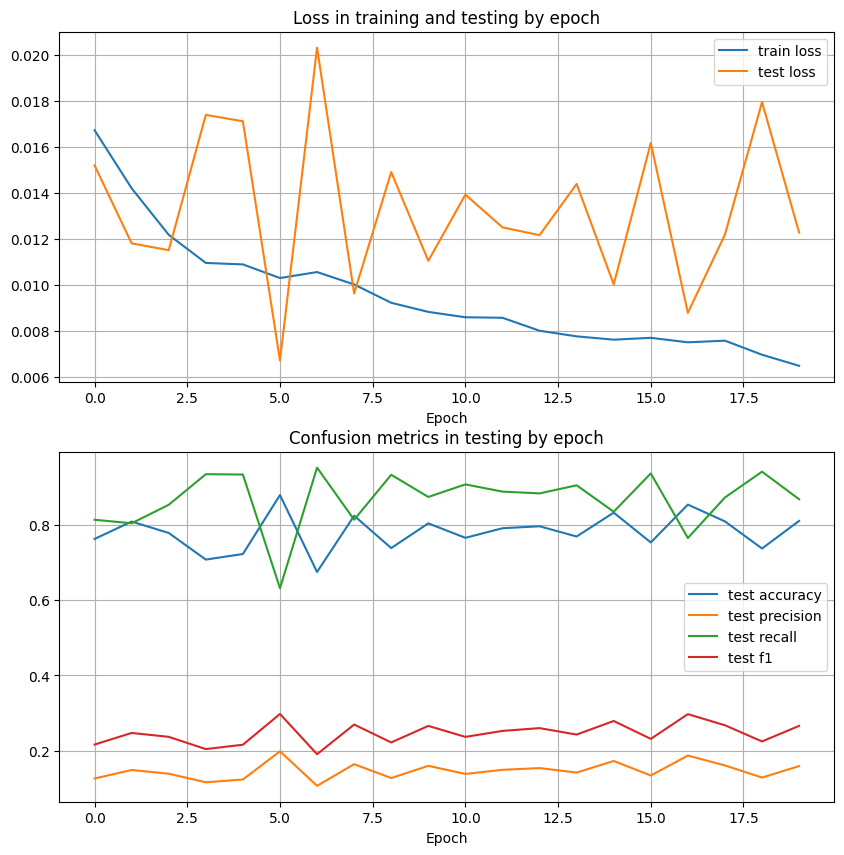

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pth")